# MALL CUSTOMERS CLUSTERING THROUGH K-MEANS

<b>INTRODUCTION:</b>
In this piece of work, we are focusing on the unsupervised machine learning method i.e. Clustering. Here, we have used the Mall Customers unlabeled dataset which consists of 5 features i.e. CustomerID, Gender, Age, Annual Income, Spending Score. We are up to make clusters of these customers on the basis of their two features, Annual Income and Spending Score. The Clustering algorithm that we are using is none other than K-Means. 

-------

<b>Importing Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<b>Loading Data And Describing It</b>

In [2]:
data = pd.read_csv("mall_customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


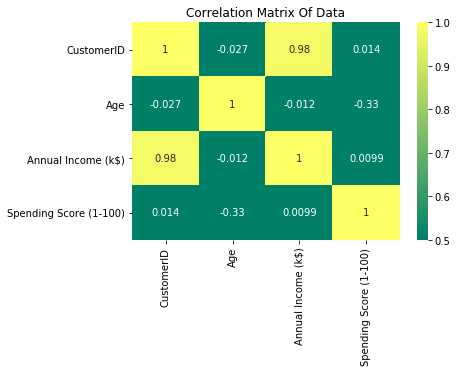

In [4]:
corr = data.corr()

sns.heatmap(corr, cmap="summer", vmin=0.5, vmax=1.0, annot=True)
plt.title("Correlation Matrix Of Data")
plt.show()

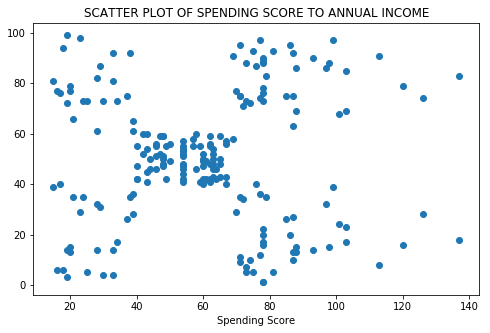

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel("Annual Salary")
plt.ylabel("Spending Score")
plt.title("SCATTER PLOT OF SPENDING SCORE TO ANNUAL INCOME")
plt.show()

<b>Extracting Clustering Features</b>

In [6]:
x = data.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<b>Analyzing Centroid & Elbow Chart</b>

In [9]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init="k-means++")
    kmean.fit(x)
    wcss.append(kmean.inertia_)

In [10]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 24986.52564064288,
 21818.114588452183,
 19636.753964898147]

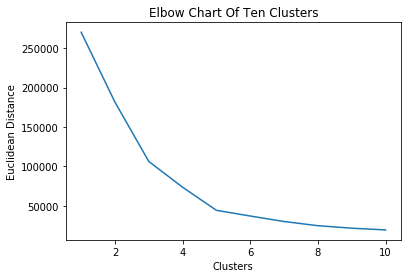

In [13]:
plt.plot(range(1,11),wcss)
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distance")
plt.title("Elbow Chart Of Ten Clusters")
plt.show()

<b>Creating Final Clustering Model</b>

In [15]:
kmeans = KMeans(n_clusters=5, init="k-means++")
y = kmeans.fit_predict(x)

In [16]:
y

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [17]:
data["Cluster"] = y

In [26]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


<b>Visualizing The Clusters</b>

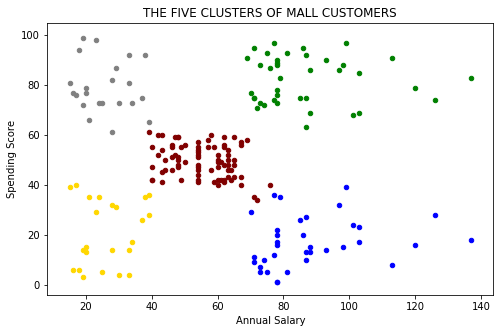

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(x[y==0, 0], x[y==0, 1], s=20, c="blue") 
plt.scatter(x[y==1, 0], x[y==1, 1], s=20, c="maroon")
plt.scatter(x[y==2, 0], x[y==2, 1], s=20, c="gold")
plt.scatter(x[y==3, 0], x[y==3, 1], s=20, c="green")
plt.scatter(x[y==4, 0], x[y==4, 1], s=20, c="gray")
plt.title("THE FIVE CLUSTERS OF MALL CUSTOMERS")
plt.xlabel("Annual Salary")
plt.ylabel("Spending Score")
plt.show()

--------

<b>CONCLUSION:</b>
After the K-Means Clustering analysis on our Mall Customers, we came to know that there are five clusters in which these customers may divide according to their two focused features i.e. Annual Salary, and Spending Score.
These are our results:

- Yellow Marks (Low Annual Salary / Low Spending Score)
- Blue Marks (High Annual Salary / Low Spending Score)
- Maroon Marks (Normal Annual Salary / Normal Spending Score)
- Gray Marks (Low Annual Salary / High Spending Score)
- Green Marks (High Annual Salary / High Spending Score)